# <h2>import libaries </h2>

In [6]:
import os
import torchvision
from torchvision import transforms
from torchvision.datasets import CocoDetection
import torch
from torch.utils.data import DataLoader

# <h2> Dowload VOC Dataset </h2>

In [14]:
transform = transforms.ToTensor()

# Download VOC Dataset
voc_dataset = torchvision.datasets.VOCDetection(
    root='/content/data/voc',  # Where to save the dataset
    year='2012',
    image_set='train',  # Use 'val' for validation set
    download=True,
    transform=transform
)

100%|██████████| 1999639040/1999639040 [01:19<00:00, 25072833.71it/s]


Extracting /content/data/voc\VOCtrainval_11-May-2012.tar to /content/data/voc


In [15]:
# DataLoader
voc_loader = DataLoader(
    dataset=voc_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# Check the dataset
print(f'Number of images: {len(voc_dataset)}')


Number of images: 5717


In [41]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

<h2> Visualize some samples </h2>

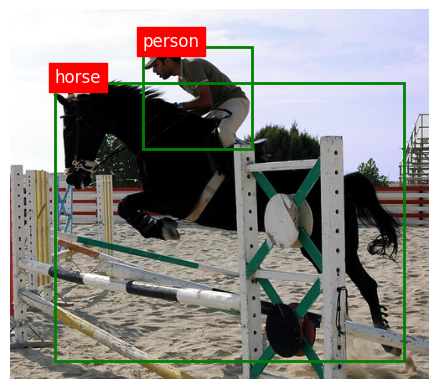

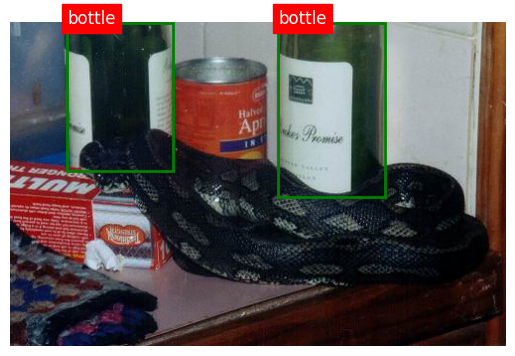

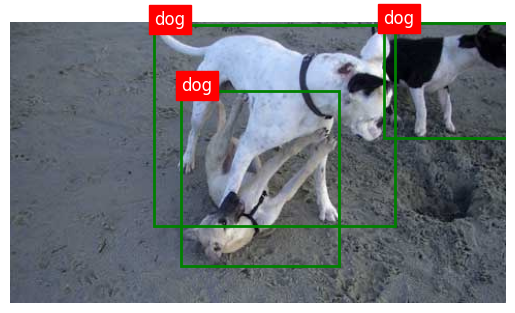

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches



dataset = voc_dataset

# visualize a few samples


def visualize_samples(index):
    
    img, target = dataset[index]


    # Convert tensor to numpy array
    img = img.permute(1,2,0).numpy()


    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for obj in target['annotation']['object']:
        bbox = obj['bndbox']
        xmin = int(bbox['xmin'])
        ymin = int(bbox['ymin'])
        xmax = int(bbox['xmax'])
        ymax  = int(bbox['ymax'])


        # rectangle box
        rect = patches.Rectangle((xmin,ymin), xmax-xmin, ymax- ymin, linewidth=2, edgecolor = 'g', facecolor = 'none')
        ax.add_patch(rect)


        # add label
        label = obj['name']
        plt.text(xmin, ymin, label, color= 'white', fontsize = 12, backgroundcolor = 'red')

    plt.axis('off')
    plt.show()

for i in range(3):
    visualize_samples(i)



In [22]:
# loading a pretrained model first 

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)


C:\Users\Shubhrika\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Shubhrika\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\Shubhrika/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 49.7MB/s] 


In [23]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

[{'boxes': tensor([[ 60.5103,   0.6464, 481.2604, 375.0000],
        [  0.0000, 145.2566,  40.8103, 370.0922],
        [  0.0000, 191.4364,  42.6746, 298.1909],
        [ 80.3925,   6.0264, 500.0000, 375.0000],
        [  0.0000, 109.6600, 126.8520, 372.7907],
        [  0.6570, 153.1300,  27.2639, 230.0410]]), 'labels': tensor([17, 62, 62, 18, 62, 85]), 'scores': tensor([0.9530, 0.5452, 0.1712, 0.1347, 0.0534, 0.0513])}]


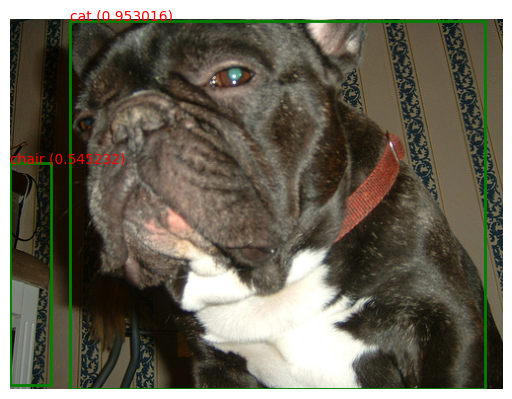

[{'boxes': tensor([[1.5456e+00, 4.7834e+01, 3.9341e+02, 3.2749e+02],
        [2.7806e+02, 2.7088e+02, 3.6235e+02, 3.3600e+02],
        [2.0100e+02, 9.0861e+00, 2.4506e+02, 6.2906e+01],
        [3.1655e+02, 2.6557e+02, 4.2788e+02, 3.1249e+02],
        [3.1648e+02, 3.6593e+00, 4.4777e+02, 3.3062e+02],
        [2.8454e+02, 1.1136e+00, 3.2171e+02, 4.0007e+01],
        [2.8144e+02, 2.6087e+02, 4.3233e+02, 3.3133e+02],
        [3.1266e+02, 0.0000e+00, 4.4800e+02, 3.0028e+02],
        [1.4599e+02, 2.3293e+01, 4.4188e+02, 3.3459e+02],
        [2.8375e+02, 0.0000e+00, 3.2181e+02, 4.3653e+01],
        [0.0000e+00, 1.6787e+01, 4.2667e+01, 1.0024e+02],
        [2.8027e+02, 2.8388e+02, 3.2020e+02, 3.3500e+02],
        [6.5355e+00, 0.0000e+00, 3.1200e+02, 3.2220e+02],
        [9.5694e-01, 3.8999e+01, 4.3447e+01, 1.0226e+02],
        [0.0000e+00, 0.0000e+00, 3.7297e+02, 3.3462e+02],
        [2.6505e-01, 4.2931e+01, 4.0168e+01, 9.9073e+01],
        [3.3574e+02, 9.5199e+01, 4.3491e+02, 3.0935e+02],
   

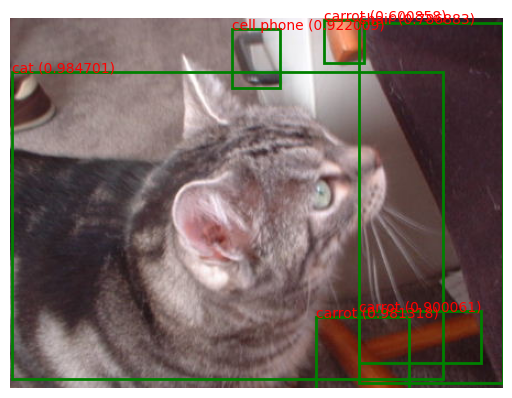

[{'boxes': tensor([[  7.6717,   6.9384, 441.1660, 474.1972],
        [ 15.1634, 206.1102, 353.4253, 487.2299],
        [  2.5940, 184.0713, 362.9165, 489.2267],
        [ 82.5041, 252.1785, 352.6148, 463.2531]]), 'labels': tensor([18, 18, 19, 34]), 'scores': tensor([0.9826, 0.4059, 0.1590, 0.0535])}]


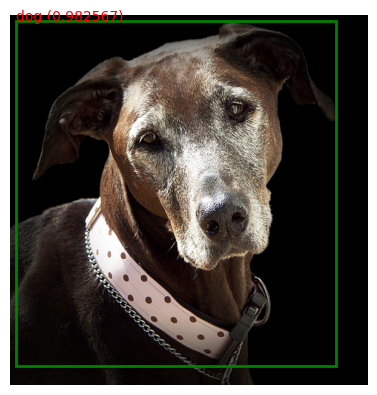

[{'boxes': tensor([[260.7915, 248.4802, 372.4268, 370.5603],
        [364.4994, 245.9861, 445.7413, 350.8106],
        [179.5915, 260.0671, 212.9936, 290.4755],
        [143.7633, 279.3212, 180.2556, 289.1819],
        [179.4602, 206.4622, 214.4310, 290.5303],
        [179.8687, 258.6637, 212.4752, 289.8965],
        [339.0456, 246.1776, 418.6362, 354.6864],
        [180.4015, 258.8428, 212.0091, 289.8643],
        [277.4680, 235.9462, 435.0710, 363.0742],
        [ 28.6828, 177.8862,  55.4376, 184.0937],
        [369.8702, 253.6537, 404.8884, 285.0306],
        [179.5596, 260.4280, 212.3844, 290.3665],
        [ 29.2636, 213.4013,  56.0371, 225.1123],
        [ 29.5859, 257.3700,  57.8156, 270.0781],
        [180.7468, 260.6559, 212.8257, 291.0568],
        [ 28.0330, 216.0096,  59.8932, 229.1595]]), 'labels': tensor([62, 62, 31, 90, 31, 33, 62, 80, 62, 84, 62, 85, 84, 84, 27, 84]), 'scores': tensor([0.9982, 0.9945, 0.2523, 0.2092, 0.1941, 0.1671, 0.1539, 0.0940, 0.0939,
        0.092

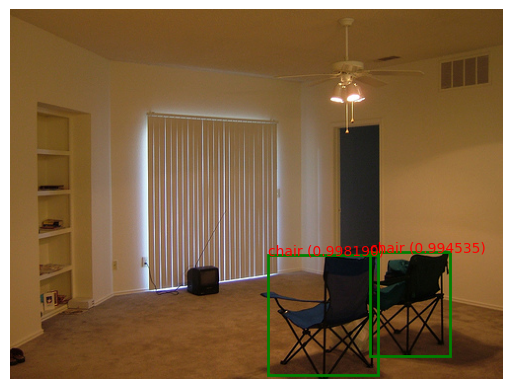

[{'boxes': tensor([[ 41.3023, 179.8957, 382.5946, 333.4067],
        [112.1996, 207.0770, 134.8476, 224.6091],
        [264.2838, 195.2142, 279.8607, 205.8006],
        [225.0416, 189.5401, 275.1255, 208.7790],
        [244.2416, 190.4752, 265.3808, 204.5187],
        [246.8236, 192.1267, 258.7404, 203.3477]]), 'labels': tensor([3, 1, 1, 1, 1, 1]), 'scores': tensor([0.9928, 0.4158, 0.1332, 0.0830, 0.0827, 0.0513])}]


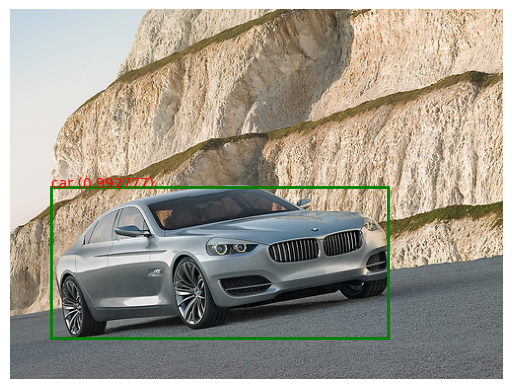

In [42]:
# USE PRETRAINED Faster R-CNN to detect objects 

def detect_objects(model, image):

    with torch.no_grad():
        prediction = model([image])

        # print(prediction)

        boxes = prediction[0]['boxes']
        labels = prediction[0]['labels']
        scores = prediction[0]['scores']

        return boxes, labels, scores
    

def visualize_detection(index):

    img, _ = dataset[index]
    boxes, labels, scores = detect_objects(model, img)

    img = img.permute(1, 2, 0).numpy()

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:

            xmin, ymin, xmax, ymax, = box
            rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth= 2, edgecolor='green', facecolor = 'none')
            ax.add_patch(rect)

            # Convert label index to name
            label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]

            plt.text(xmin, ymin, f'{label_name} ({score:2f})', color ='r')

    plt.axis('off')
    plt.show()


for i in range(10,15):
    visualize_detection(i)